# Introduction

Cardiovascular diseases (CVDs) are the leading cause of death worldwide, responsible for approximately 17.9 million fatalities annually, representing 31% of all global deaths. Four out of 5 CVD-related deaths result from heart attacks and strokes, with one-third occurring prematurely in individuals under 70 years old. Heart failure, a common consequence of CVDs, is addressed in [this dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction), which comprises 11 features for predicting potential heart disease.

Early detection and management are crucial for individuals with cardiovascular disease or those at high cardiovascular risk, often due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidemia, or established disease.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In this dataset 918 observations, 508 of which has heart disease, are presented in 12 featires which can describe common risk factors of CVD for each sample:
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] \(Is patient might have diabetes (1) or not (0)\)
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

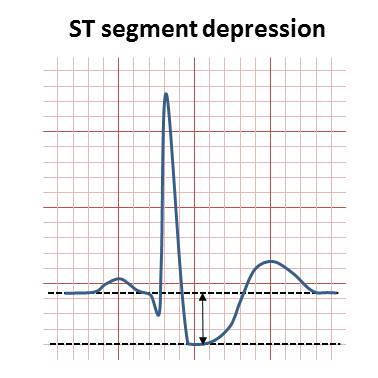

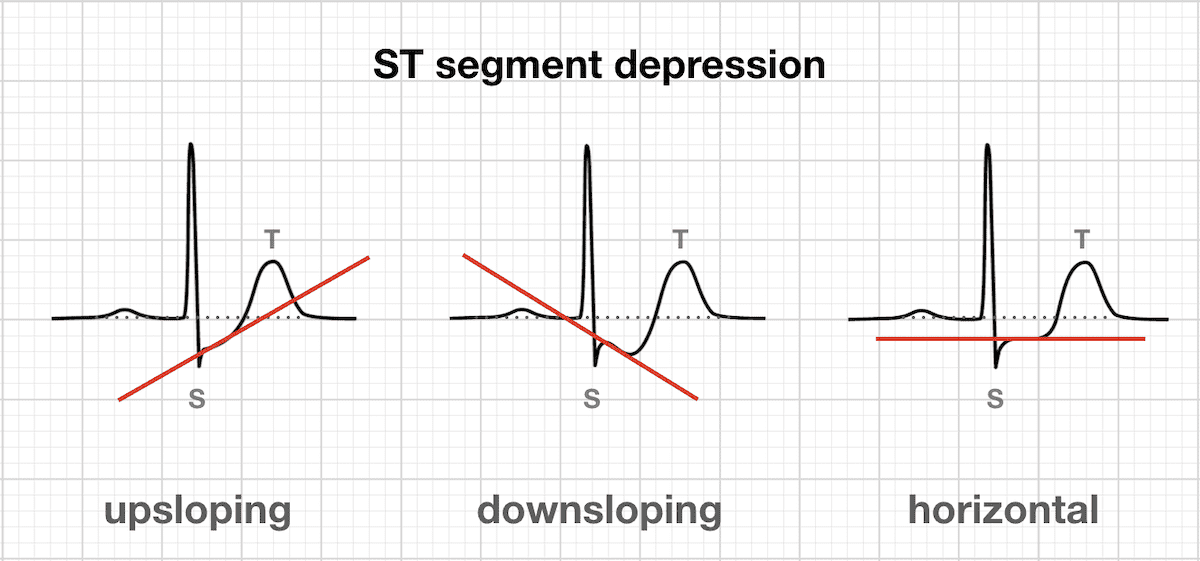

In [5]:
# checking for total null values

data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Data analysis

## Number of categorical and ordinal features dideased and healthy

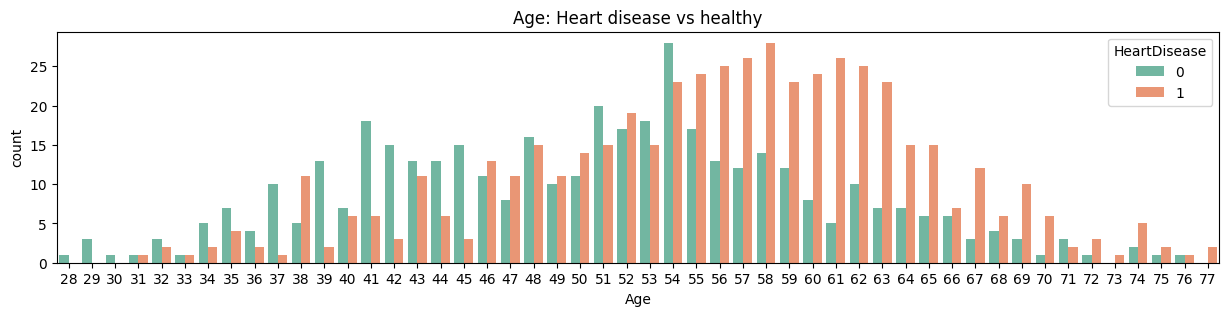

In [13]:
f, ax=plt.subplots(1, 1, figsize=(15,3))
sns.countplot(data, x='Age',hue='HeartDisease', palette='Set2')
ax.set_title('Age: Heart disease vs healthy')
plt.show()

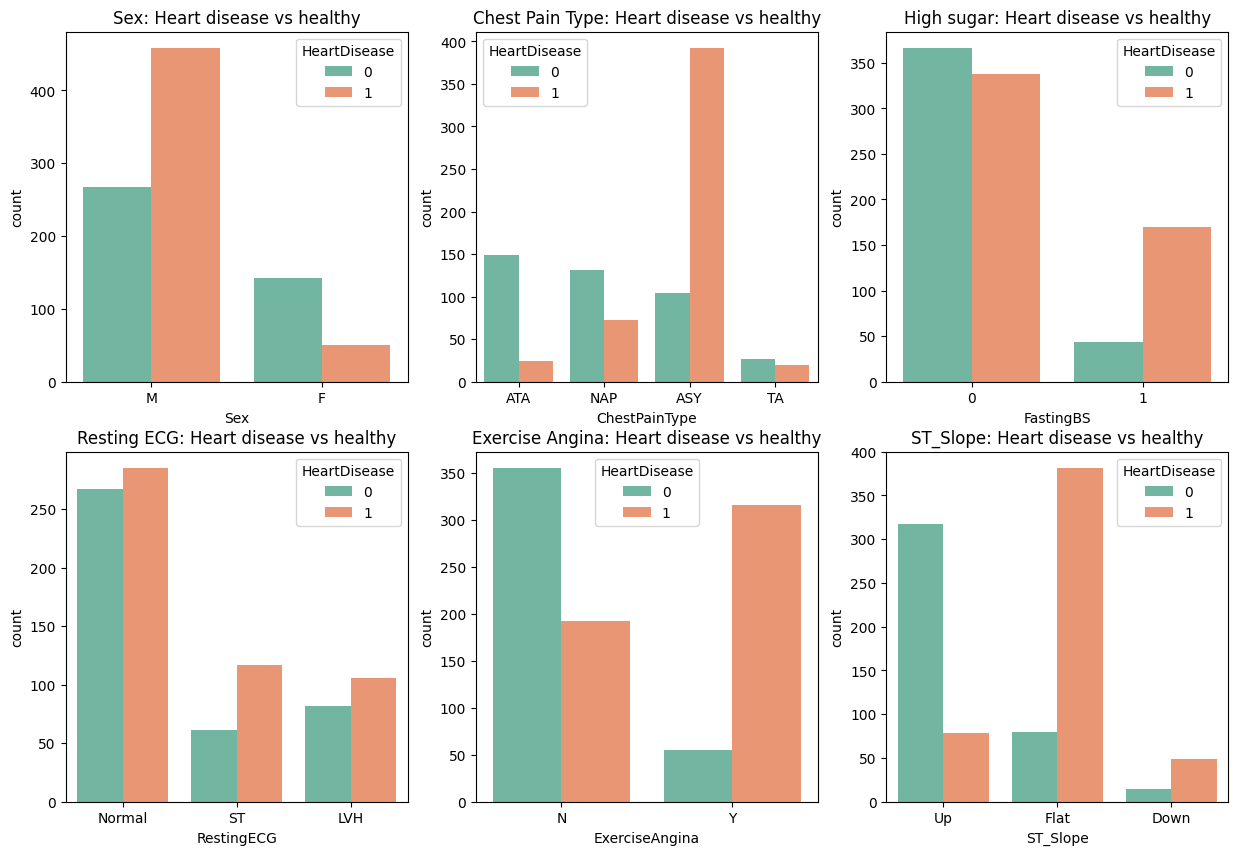

In [29]:
f, ax=plt.subplots(2, 3, figsize=(15,10))

sns.countplot(data, x='Sex',hue='HeartDisease', ax=ax[0][0], palette='Set2')
ax[0][0].set_title('Sex: Heart disease vs healthy')

sns.countplot(data, x='ChestPainType',hue='HeartDisease', ax=ax[0][1], palette='Set2')
ax[0][1].set_title('Chest Pain Type: Heart disease vs healthy')

sns.countplot(data, x='FastingBS',hue='HeartDisease', ax=ax[0][2], palette='Set2')
ax[0][2].set_title('High sugar: Heart disease vs healthy')

sns.countplot(data, x='RestingECG',hue='HeartDisease', ax=ax[1][0], palette='Set2')
ax[1][0].set_title('Resting ECG: Heart disease vs healthy')

sns.countplot(data, x='ExerciseAngina',hue='HeartDisease', ax=ax[1][1], palette='Set2')
ax[1][1].set_title('Exercise Angina: Heart disease vs healthy')

sns.countplot(data, x='ST_Slope',hue='HeartDisease', ax=ax[1][2], palette='Set2')
ax[1][2].set_title('ST_Slope: Heart disease vs healthy')

plt.show()

Judging from preliminary data, the age histogram shows that at the age of 55, there comes a situation where most peers have heart disease. At younger ages, there is a pattern of across-the-board healthy diagnoses or where the number of heart disease diagnoses is equal to the number of conclusions that the patient is healthy, but the outlier at age 38 provides interest. It is also clear that elevated blood sugar and the presence of angina when exercising can be associated with heart disease, but it is interesting that the proportion of patients exceeds the healthy in the male category when no pain is present and when the slope of ST section of the electrocardiogram is flat or descending. Referring to [this article](https://pubmed.ncbi.nlm.nih.gov/3739881/), ST criterion is the conventional criterion for coronary artery disease. One should look at the heart rate (HR) distribution, so judging from the information in the article as ST/HR criterion in the aggregate appears to be a much more accurate criterion than the conventional ST criterion

## Analysis of continuous features

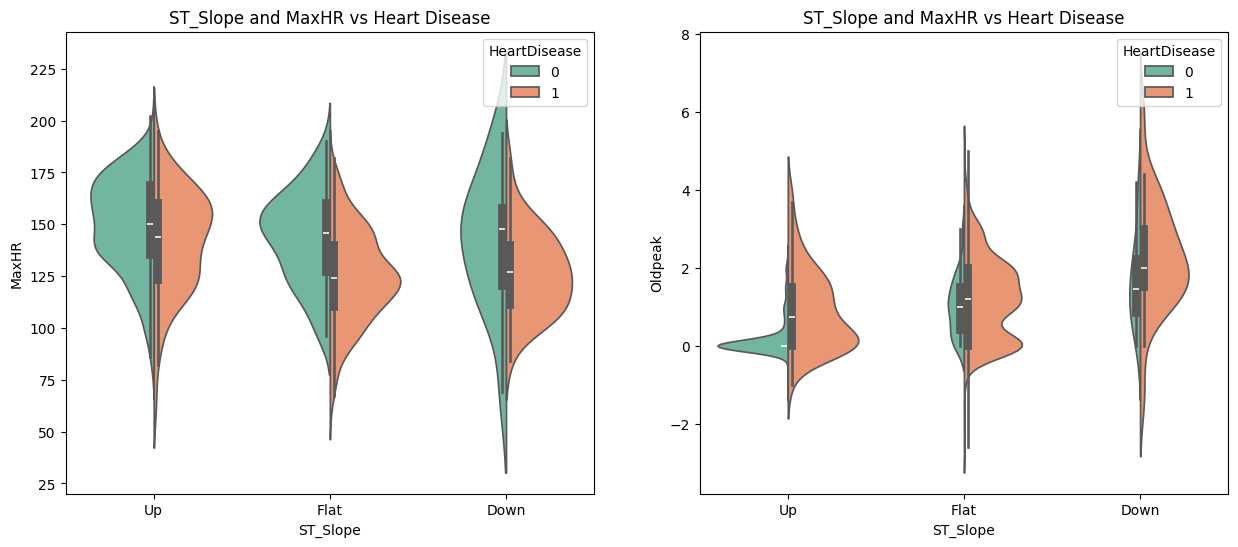

In [33]:
f, ax=plt.subplots(1,2, figsize=(15,6))

sns.violinplot(data, x="ST_Slope", y="MaxHR", hue="HeartDisease", split=True, ax=ax[0], palette="Set2")
ax[0].set_title('ST_Slope and MaxHR vs Heart Disease')

sns.violinplot(data, x="ST_Slope", y="Oldpeak", hue="HeartDisease", split=True, ax=ax[1], palette="Set2")
ax[1].set_title('ST_Slope and Oldpeak vs Heart Disease')

plt.show()

In HR/ST violin plot we can observe different patterns with different types of slope. In the ascending type of ST plot, the higher the heart rate, the higher the risk of heart disease. On the other plots the picture is the opposite - the lower the frequency, the more often people get sick.  On the graph of the distance of the slope from the norm (zero), the closer to zero, the higher the chance of being healthy, meanwhile almost any deviation drastically increases the number of diseased people

Lets also draw non cardiogram related features with age

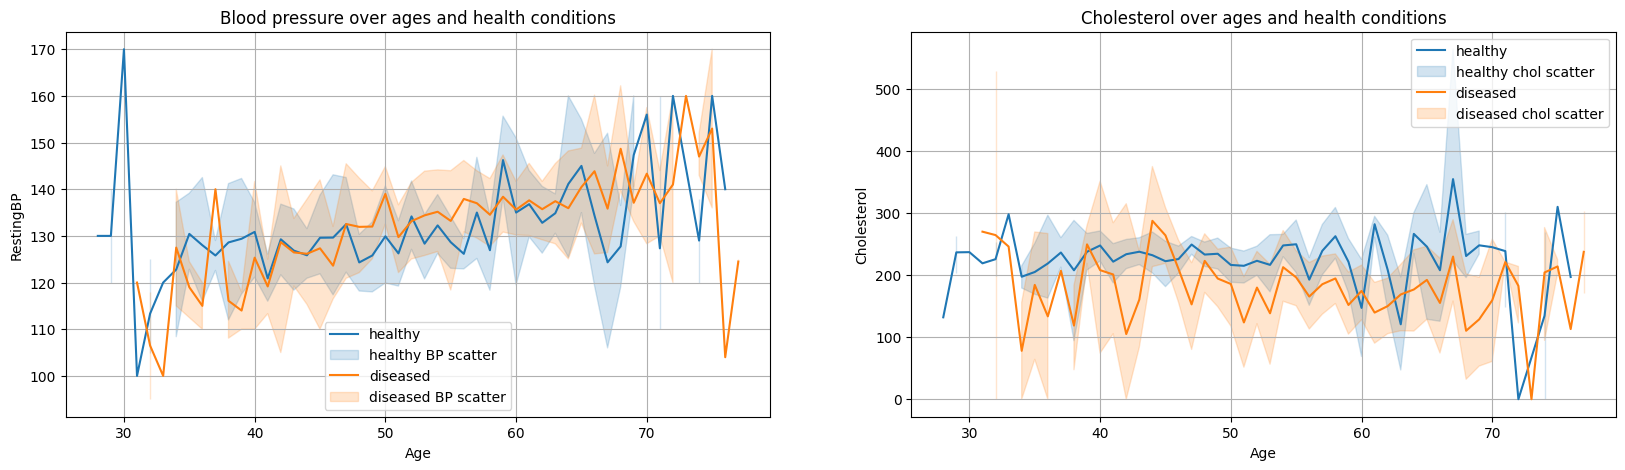

In [51]:
f, ax = plt.subplots(1,2, figsize=(20,5))

sns.lineplot(data[data['HeartDisease']==0], x = 'Age', y = 'RestingBP', ax=ax[0])
sns.lineplot(data[data['HeartDisease']==1], x = 'Age', y = 'RestingBP', ax=ax[0])
ax[0].legend(['healthy', 'healthy BP scatter', 'diseased', "diseased BP scatter"])
ax[0].grid(visible = True)
ax[0].set_title('Blood pressure over ages and health conditions')

sns.lineplot(data[data['HeartDisease']==0], x = 'Age', y = 'Cholesterol', ax=ax[1])
sns.lineplot(data[data['HeartDisease']==1], x = 'Age', y = 'Cholesterol', ax=ax[1])
ax[1].legend(['healthy', 'healthy chol scatter', 'diseased', "diseased chol scatter"])
ax[1].grid(visible = True)
ax[1].set_title('Cholesterol over ages and health conditions')

plt.show()

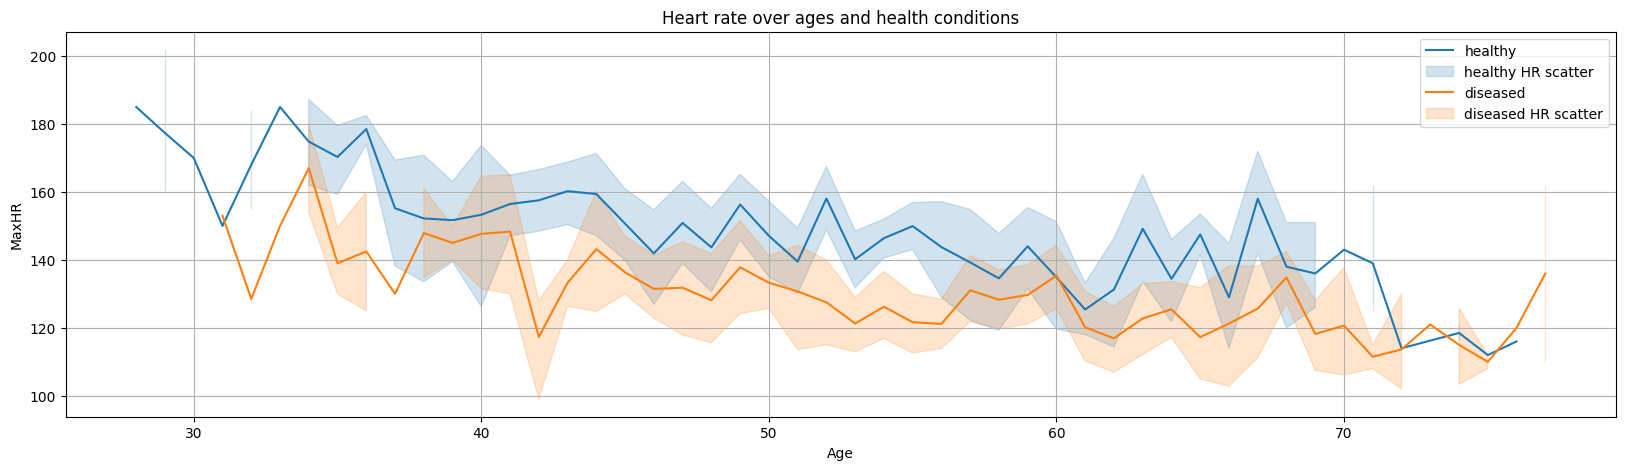

In [57]:
f, ax = plt.subplots(1,1, figsize=(20,5))

sns.lineplot(data[data['HeartDisease']==0], x = 'Age', y = 'MaxHR')
sns.lineplot(data[data['HeartDisease']==1], x = 'Age', y = 'MaxHR')
ax.legend(['healthy', 'healthy HR scatter', 'diseased', "diseased HR scatter"])
ax.grid(visible = True)
ax.set_title('Heart rate over ages and health conditions')

plt.show()

These two graphs did not show large differences between sick and healthy patients. In the left graph you can see an increase in blood pressure, which according to [this article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10243231/) may increase the risk of heart disease. This pattern in our graph is observed in the young adult patient interval (aged 20-39 years), just where the abnormality was found in the 38-year-old patients. As for the cholesterol-age dependence graph, no significant excesses from the norm were also observed, perhaps it is connected with the fact that the original sample did not have data on patients with high cholesterol, and this is one of the risk factors according to [this article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6220545/)

# Correlations

## Converting String Values into Numeric
Since we cannot pass strings to a machine learning model, we need to convert features loke Gender, Embarked, etc into numeric values

In [52]:
data['Sex'].replace(['M','F'], [0,1], inplace=True)
data['ChestPainType'].replace(['ATA','NAP','ASY','TA'], [0,1,2,3], inplace=True)
data['RestingECG'].replace(['Normal','ST','LVH'], [0,1,2], inplace=True)
data['ExerciseAngina'].replace(['N','Y'], [0,1], inplace=True)
data['ST_Slope'].replace(['Up','Flat','Down'], [0,1,2], inplace=True)

## Buildind a heatmap

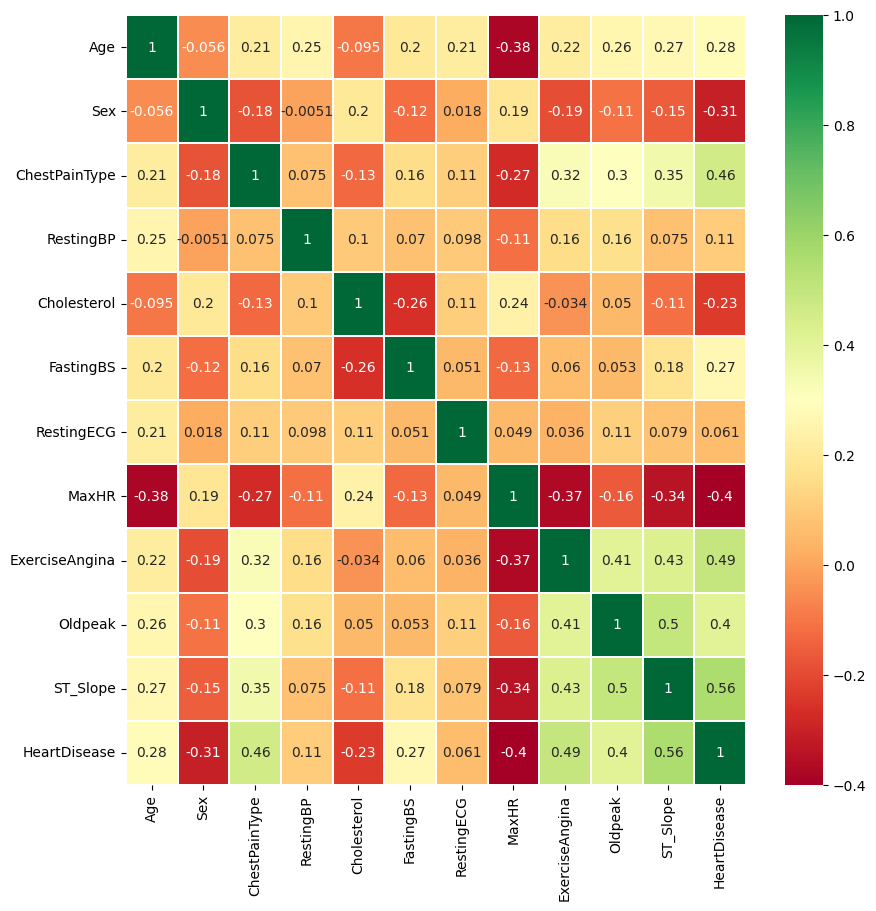

In [53]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})

fig=plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


As expected, a fairly strong correlation developed in this dataset between the diagnosis of heart disease and data from the cardiogram; it is not for nothing that doctors mainly rely on ECG data when making a diagnosis. Since age is one of the risk factors, it also has some positive relationship with diagnosis. However, a connection with heart rate has not been established. Together with the ECG data, the type of pain experienced by patients has a high correlation, but remembering what the picture was there, you can understand that this heat map means that in most cases patients will not have complaints even if they have heart problems, since most patients had an asymptomatic course of the disease